# 상관관계 시각화(히트맵)



* 두 변수 간의 관계의 정도     

* 두 확률변수가 함께 변화하는지의 정도를 측정하는 값
    * 단점: 측정 단위 크기를 반영하지 못해 절대적인 상관성의 정도를 파악하기 어려움
    * 단점 극복: 공분산을 두 변수의 표준편차 곱으로 나누어 표준화시킴 (= 상관계수)



## 상관분석의 유형
__가.__ 피어슨 상관계수
* 두 연속형 자료가 모두 정규성을 따른다는 가정
* 선형적 상관관계를 측정
* -1부터 1사이의 값    

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">판다스 사용 시</td>
            <td style="text-align: left;">corr(method='pearson')</td>
        </tr>
        <tr>
            <td style="text-align: left;">싸이파이 사용 시</td>
            <td style="text-align: left;">stats.pearsonr(df1, df2)</td>
        </tr>
    </table>
</div>   

__나.__ 스피어만 상관계수
* 두 변수가 정규성을 만족하지 않거나, 변수가 순위 및 순서 형태로 주어지는 경우
* 비모수적 방법 (데이터에 순위를 매긴 후 그 순위에 대한 상관계수를 산출함. 실제값 이용 X)
* -1부터 1사이의 값
* 비선형관계의 연관성 파악 가능
* 연속형, 이산형, 순서형 자료에 적용 가능

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">판다스 사용 시</td>
            <td style="text-align: left;">corr(method='spearman')</td>
        </tr>
        <tr>
            <td style="text-align: left;">싸이파이 사용 시</td>
            <td style="text-align: left;">stats.spearmanr(df1, df2) </td>
        </tr>
    </table>
</div>        


__다.__ 켄달의 순위상관계수
* 데이터가 순서쌍(Xi, Yi)로 주어졌을 때
    * Xi가 커짐에 따라 Yi도 커질 경우: 부합
    * Xi가 커짐에 따라 Yi가 작아질 경우: 비부합
* 전체 데이터에서 비부합상에 대한 부합쌍의 비율로 상관계수를 산출함
* -1부터 1사이의 값
    * 순위상관계수가 1일 경우: 부합쌍의 비율이 100%
    * 순위상관계수가 -1일 경우: 비부합쌍의 비율이 100%
    * 순위상관계수가 0일 경우: 두 변수 X와 Y는 상관성이 없음

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">판다스 사용 시</td>
            <td style="text-align: left;">corr(method='kendall')</td>
        </tr>
        <tr>
            <td style="text-align: left;">싸이파이 사용 시</td>
            <td style="text-align: left;">stats.kendalltau(df1, df2) </td>
        </tr>
    </table>
</div>   

__[예제 1]__   
air 데이터 내의 네 가지 변수 조합별 피어슨 상관계수 그래프 그리기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air = pd.read_csv("../../data/airquality.csv")
air


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [3]:
air = air.iloc[:,:4]
air

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,NaN,14.3,56
...,...,...,...,...
148,30.0,193.0,6.9,70
149,NaN,145.0,13.2,77
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


In [7]:
air_cor = air.corr(method='pearson')
air_cor

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.601547,0.698360
Solar.R,0.348342,1.000000,-0.056792,0.275840
Wind,-0.601547,-0.056792,1.000000,-0.457988
Temp,0.698360,0.275840,-0.457988,1.000000


## 히트맵

    sns.heatmap(df,
               xticklabels = df.columns,
               yticklabels = df.columns,
               cmap='RdBu_r',
               annot=True,  # True: 상관계수 텍스트로 보이게 해줌
               linewidth=0.5)

In [8]:
air_cor.style.background_gradient(cmap='coolwarm')

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.601547,0.698360
Solar.R,0.348342,1.000000,-0.056792,0.275840
Wind,-0.601547,-0.056792,1.000000,-0.457988
Temp,0.698360,0.275840,-0.457988,1.000000


<AxesSubplot:>

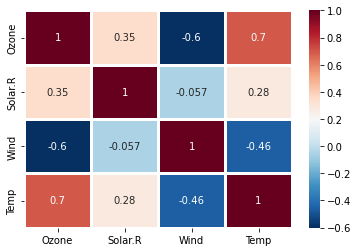

In [13]:
sns.heatmap(air_cor,
           xticklabels = air_cor.columns,
           yticklabels = air_cor.columns,
           cmap='RdBu_r',
           annot=True, 
           linewidth=3)

## 산점도 행렬

두 개 이상의 변수가 있는 데이터에서 변수들 간의 산점도를 그린 그래프

여러 변수들 간의 산점도를 한 번에 볼 수 있도록 표현하여 변수들 간의 상관관계를 비교할 수 있음


<seaborn의 pairplot>  
> seaborn.pairplot(data, hue=None, kind='scatter', diag_kind='auto', markers=None, dropna=False, corner=True)
> - data : pandas.DataFrame
> - hue : 데이터의 범주형 변수. 집단을 색으로 구분해서 플롯을 그려줌
> - kind : 'scatter'(산점도), 'kde'(밀도그래프), 'hist'(히스토그램), 'reg'(회귀선)로 구성.
> - diag_kind : 'auto', 'hist', 'kde', None으로 구성
> - markers : 마커 코드
> - corner : True로 할 경우 세모 모양 상관계수 그래프 (디폴트는 False)

In [14]:
iris = pd.read_csv('../../data/iris.csv')

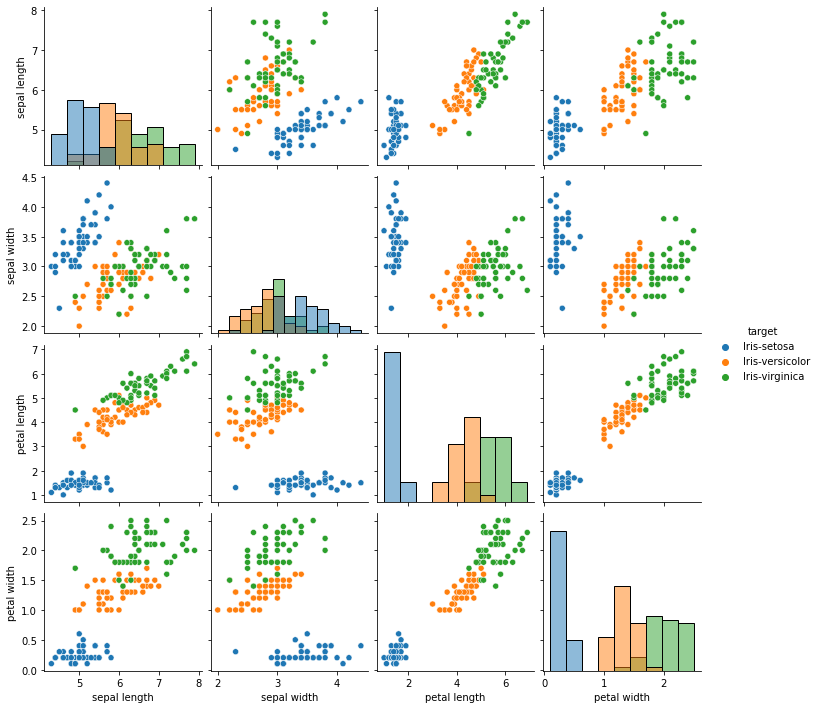

In [16]:
# 범주형 변수의 범주에 따라 다른 색상으로 나타낼 수도 있음

sns.pairplot(iris, diag_kind='hist', hue="target") # pastel, bright, deep, muted, colorblind, dark

#    kind : {'scatter', 'kde', 'hist', 'reg'}
#    diag_kind : {'auto', 'hist', 'kde', None}

plt.show()